# Load Trained Model

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [16]:
model = keras.models.load_model('dogs-vs-cats.h5')

In [17]:
for layer in model.layers:
    print(layer.get_weights())

[array([[[[-1.77227706e-01,  8.96659121e-02, -1.59348443e-01,
          -1.37257943e-04, -5.16337417e-02, -8.49814713e-02,
          -1.37481600e-01,  1.07712135e-01,  5.35357296e-02,
           1.06188012e-02, -1.42410919e-01, -1.57083198e-01,
           1.26777902e-01, -6.48692697e-02, -1.25046864e-01,
           1.34466186e-01],
         [ 1.58495292e-01,  1.81239456e-01, -7.80043304e-02,
           1.80040225e-01,  3.82373855e-02, -7.01009780e-02,
          -8.45620185e-02, -1.11532867e-01,  1.28176630e-01,
          -1.49211287e-01, -5.12703881e-02,  3.24404128e-02,
           1.74898311e-01, -1.65846020e-01,  2.48966776e-02,
          -1.32726058e-01],
         [-5.95628023e-02,  1.41415864e-01,  2.51048580e-02,
           1.10851392e-01, -1.09431006e-01, -6.35721684e-02,
          -1.45546913e-01, -1.25710323e-01, -1.36224344e-01,
           1.00730360e-01,  4.29521538e-02,  1.10996999e-01,
          -7.55290166e-02, -1.26487136e-01, -4.07027565e-02,
          -2.04807371e-01]],

# Do Prediction

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [19]:
from PIL import Image
import requests

In [20]:
def load_image(path):
    if path.startswith('http'): # url path
        im = Image.open(requests.get(path, stream=True, verify=False).raw)
    else: # local file
        im = Image.open(path)
    return im

In [21]:
def show_image(path):
    im = load_image(path)
    image = np.array(im)
    plt.imshow(image)

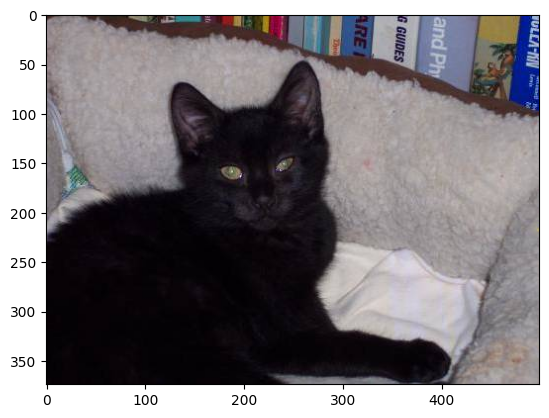

In [22]:
show_image('input_test/all_classes/9874.jpg')

In [23]:
url_image = 'https://media.npr.org/assets/img/2022/05/25/gettyimages-917452888-edit_custom-c656c35e4e40bf22799195af846379af6538810c-s1100-c50.jpg'

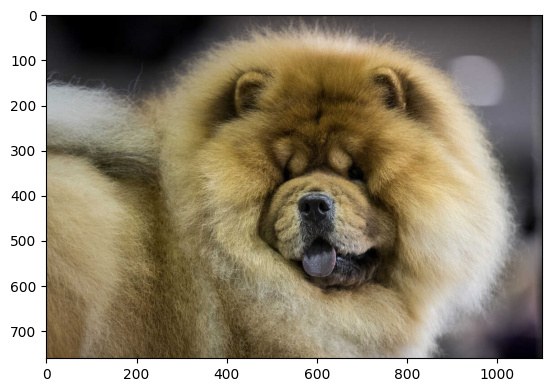

In [24]:
show_image(url_image)

In [25]:
def predict_cats_or_dogs(path): 
    im = load_image(path)
    im_newsize = im.crop()
    newsize = (150, 150)
    im_newsize = im.resize(newsize)
    print('Resized Image')
    fimage = np.array(im_newsize)
    fimage = fimage / 255

    x = np.expand_dims(fimage, axis=0)
    result = model.predict(x)
    print(result)
    if result[0][0] < 0.5 :
        print('It should be a cat')
    else : 
        print('It should be a dog')

In [26]:
predict_cats_or_dogs('input_test/all_classes/9874.jpg')

Resized Image
1/1 [==============================] - 0s 50ms/step
[[0.20122285]]
It should be a cat


In [27]:
predict_cats_or_dogs('https://www.purina.co.uk/sites/default/files/2022-02/GettyImages-973019520.jpg')

Resized Image
1/1 [==============================] - 0s 19ms/step
[[0.4839036]]
It should be a cat


In [28]:
predict_cats_or_dogs('https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/large-dog-breeds-chow-chow-1646848584.jpg?crop=0.535xw:1.00xh;0.202xw,0&resize=480:*')

Resized Image
1/1 [==============================] - 0s 19ms/step
[[0.7761222]]
It should be a dog
